**End to End ML Project deployment steps**
 
 1. Create new enviroment to setup the necessary packages required.
 cmd = conda create -n {Env_name} python={python_version_number}
 2. To activate the created environment from above step
 cmd = conda activate {Env_name}
 3. Install necessary packages
 

In [1]:
!pip install sklearn

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("car data.csv")
df.head(7)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

**Find the categorical features in the dataset**

In [5]:
cat_cols =[ feature for feature in df.columns if df[feature].dtypes=='O' ]
cat_cols.remove("Car_Name")
cat_cols.extend(["Owner"])

**Finding the unique categories in the cat features** 

In [6]:
for feature in cat_cols:
    print("The no. of unique values in {} are : {}".format(feature,df[feature].unique()))

The no. of unique values in Fuel_Type are : ['Petrol' 'Diesel' 'CNG']
The no. of unique values in Seller_Type are : ['Dealer' 'Individual']
The no. of unique values in Transmission are : ['Manual' 'Automatic']
The no. of unique values in Owner are : [0 1 3]


**Finding and Treating the missing values in the dataset**

In [7]:
!pip install missingno

*Another way to find the missing values in given dataset*

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

**Describe the 5 pointer stats for numerical features in the datset**

In [9]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


*Compute a new feature called the Car_age_years used to find number of years for car useage from current year 2022* 

In [10]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [11]:
#Remove Car_Name feature as it is not needed for model creation
car_df = df.drop(["Car_Name"],axis=1) 

In [12]:
car_df["Car_Age_years"] = 2022 - car_df["Year"]
car_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [13]:
#Remove the year column as we have got Car-Age_years
car_df.drop(["Year"],axis=1,inplace=True)
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Car_Age_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


**Do one hot encoding to convert the categorical features to numerical features and drop the first category type as it can be expressed as combination of remaining features** 
*Dummy variable trap*

In [14]:
car_df = pd.get_dummies(car_df,drop_first=True)
car_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,8,0,1,0,1
1,4.75,9.54,43000,0,9,1,0,0,1
2,7.25,9.85,6900,0,5,0,1,0,1
3,2.85,4.15,5200,0,11,0,1,0,1
4,4.60,6.87,42450,0,8,1,0,0,1


In [15]:
df["Fuel_Type"].unique()
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [16]:
car_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Age_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

*Find the correlation between num features and use heat map to visualize it*

In [17]:
car_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Car_Age_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


In [18]:
!pip install seaborn

In [19]:
import seaborn as sns

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

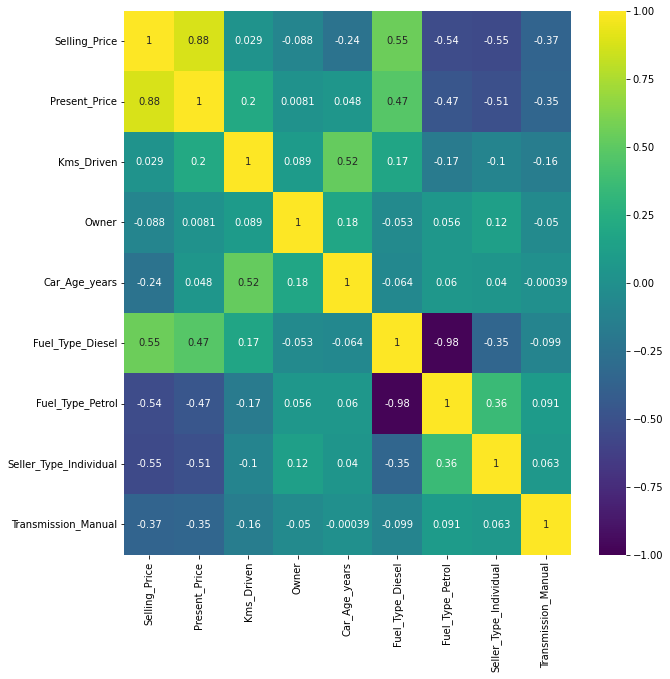

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(car_df.corr(),vmax=1,vmin=-1,cmap="viridis",annot=True)

<AxesSubplot:>

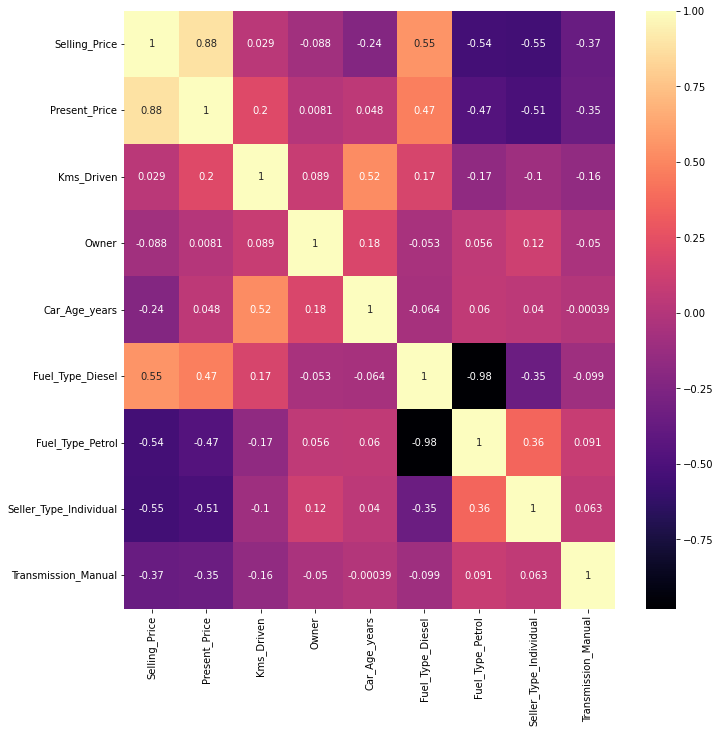

In [22]:
corrmat = car_df.corr()
top_corr_featues = corrmat.index
plt.figure(figsize=(11,11))
sns.heatmap(car_df[top_corr_featues].corr(),cmap="magma",annot=True)

*Splitting into dependent and independent features from dataset*

In [23]:
car_df.columns

Index(['Selling_Price', 'Present_Price', 'Kms_Driven', 'Owner',
       'Car_Age_years', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol',
       'Seller_Type_Individual', 'Transmission_Manual'],
      dtype='object')

In [24]:
ind_columns = list(car_df.columns)[1:]
dep_columns = list(car_df.columns)[0]
X = car_df.iloc[:,1:]
y = car_df.iloc[:,0]

In [25]:
dep_columns

'Selling_Price'

In [26]:
ind_columns

['Present_Price',
 'Kms_Driven',
 'Owner',
 'Car_Age_years',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [27]:
X.head()

,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,8,0,1,0,1
1,9.54,43000,0,9,1,0,0,1
2,9.85,6900,0,5,0,1,0,1
3,4.15,5200,0,11,0,1,0,1
4,6.87,42450,0,8,1,0,0,1


In [28]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

**Obtain feature importance using ExtraTreeRegressor**

In [29]:
from sklearn.ensemble import ExtraTreesRegressor
extre_model = ExtraTreesRegressor()

In [30]:
extre_model.fit(X,y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

In [31]:
feature_imp = list(extre_model.feature_importances_)

In [32]:
imp_dict = {k:v for (k,v) in zip(ind_columns,feature_imp)}

In [33]:
imp_dict

{'Present_Price': 0.36458756233765427,
 'Kms_Driven': 0.04249788413471736,
 'Owner': 0.0004111817960526531,
 'Car_Age_years': 0.0756726792368167,
 'Fuel_Type_Diesel': 0.22721922400698497,
 'Fuel_Type_Petrol': 0.014110476762535658,
 'Seller_Type_Individual': 0.12573912307874863,
 'Transmission_Manual': 0.14976186864648983}

C:\Users\Nagarajan-PC\Anaconda3\envs\cardekhoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

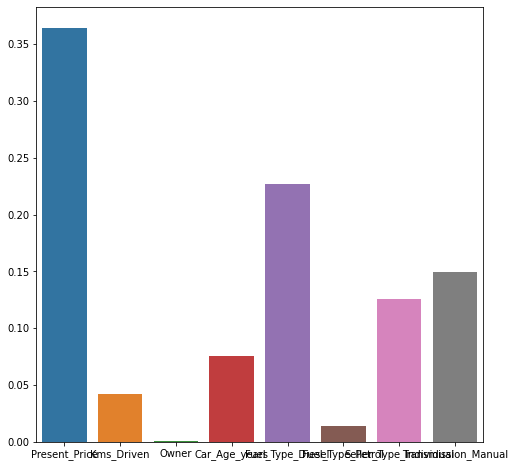

In [34]:
plt.figure(figsize=(8,8))
sns.barplot(ind_columns,feature_imp) 

<AxesSubplot:>

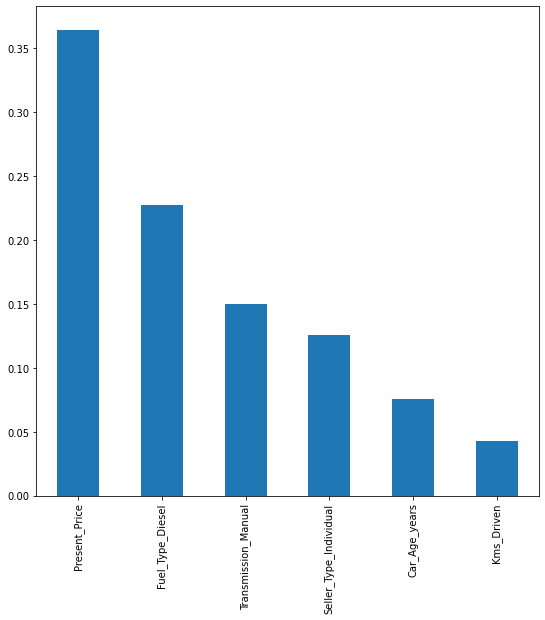

In [35]:
# Plotting the top 6 features for feature selection based on feature importance using ExtratreeRegressor
plt.figure(figsize=(9,9))
f_imp_series = pd.Series(feature_imp,index=ind_columns)
f_imp_series.nlargest(6).plot(kind="bar")


**Train and test split**

In [36]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)
print(X_train.shape,y_train.shape)


(210, 8) (210,)


In [37]:
X_train.head()

,Present_Price,Kms_Driven,Owner,Car_Age_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
222,7.60,77632,0,8,1,0,0,1
283,11.80,9010,0,6,0,1,0,1
44,2.69,50000,0,10,0,1,0,1
245,9.40,71000,0,10,1,0,0,1
191,0.57,25000,1,10,0,1,1,1


In [38]:
y_train.head()

222    6.00
283    8.99
44     1.25
245    5.20
191    0.20
Name: Selling_Price, dtype: float64

**Use Random Forest Reggressor as ML model**

In [39]:
from sklearn.ensemble import RandomForestRegressor
reg_model = RandomForestRegressor()

**Use RandomSearchCV for Hyperparameter Tuning of RF Reggressor model**

In [41]:
import numpy as np
n_estimators = [int(x) for x in np.linspace(100,1000,num=10)]
max_features = ['auto','sqrt']
max_depth = np.arange(5,31,step=5,dtype=np.int64).tolist()
min_samples_split = [2,5,10,20,50]
min_samples_leaf = [2,5,10,12,20,50]

In [42]:
from sklearn.model_selection import RandomizedSearchCV

grid_params = {"n_estimators": n_estimators,
               "max_features": max_features,
               "max_depth": max_depth,
               "min_samples_split": min_samples_split,
               "min_samples_leaf": min_samples_leaf
              }


In [43]:
rand_ser_cv = RandomizedSearchCV(reg_model,param_distributions=grid_params,n_iter=10,n_jobs=1,
                                 scoring="neg_mean_squared_error",verbose=2,cv=10)

In [44]:
# Using the various hyper parameters for RF Reggressor model from grid_params dict and fitting it to X_train and y_train
rand_ser_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10, total=   0.9s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10, total=   0.8s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10, total=   1.2s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10, total=   1.4s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10 
[CV]  n_estimators=700, min_samples_split=2, min_samples_leaf=12, max_features=auto, max_depth=10, total=   1.3s
[CV] n_estimators=700, min_samples_split=2,

[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25, total=   1.7s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25, total=   1.6s
[CV] n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25 
[CV]  n_estimators=900, min_samples_split=20, min_samples_leaf=20, max_features=auto, max_depth=25, total=   1.5s
[CV] n_estimators=900, min_samples

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=20, max_features=sqrt, max_depth=30, total=   1.2s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=5, max_features=sqrt, max_depth=5, total=   1.7s
[CV] n_estimators=1000, min_samples_split=2, min_s

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                             

In [45]:
rand_ser_cv.best_params_

{'n_estimators': 1000,
 'min_samples_split': 20,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 5}

In [46]:
rand_ser_cv.best_score_

-4.748232666946775

In [47]:
# Getting predictions from RF model
y_pred = rand_ser_cv.predict(X_test)
y_pred

array([ 7.02198924,  0.57306158,  4.72372345,  8.18745468, 10.2104508 ,
        4.90346121,  3.44671927,  0.31750679,  3.98418083,  4.79260208,
        2.86448459,  0.59053798,  4.87479087,  7.1243225 ,  7.40113504,
       10.55707776,  7.09187906,  4.48702395,  0.58020512,  1.25237148,
        3.49607109,  4.88349353,  5.20364908,  9.81301632,  0.28072077,
        0.58890441,  0.37956988,  0.78728988,  0.58020512,  6.10103135,
        3.02986657,  5.92654822,  0.58470701,  7.18304596,  3.88882766,
        1.24117884,  5.4817677 ,  5.43766869,  0.28267794,  8.10222395,
        7.27891938, 20.82171436,  4.73590112,  4.74580111,  5.61395132,
        9.80465317,  0.29015436,  0.73753272,  5.19846639,  6.94555631,
        6.79068553,  3.1598311 ,  5.14502981, 20.82171436,  1.24049988,
        1.23978299,  0.39306915,  2.81541826,  3.92244087,  2.34572624,
        5.80667581,  5.7441699 ,  2.88809075, 20.83362212,  4.54348809,
        5.64745549,  9.49114552,  6.36994593,  0.31808211,  3.19

C:\Users\Nagarajan-PC\Anaconda3\envs\cardekhoenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

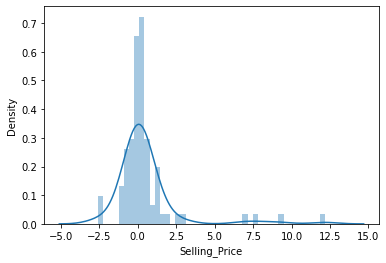

In [48]:
sns.distplot(y_test-y_pred)

C:\Users\Nagarajan-PC\Anaconda3\envs\cardekhoenv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Selling_Price'>

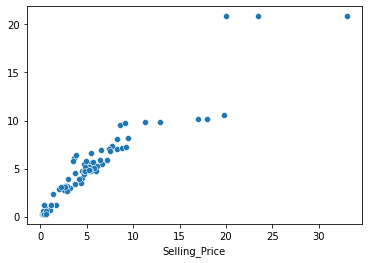

In [49]:
sns.scatterplot(y_test,y_pred)

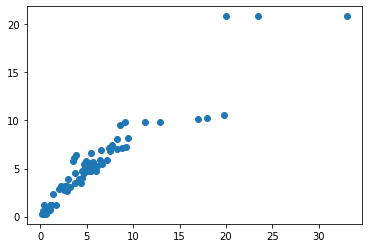

In [50]:
plt.scatter(y_test,y_pred)

In [51]:
new_y = y_test.to_list()
new_y_pred = y_pred.tolist()

In [52]:
new_df = pd.DataFrame({"target":new_y,"pred_target":new_y_pred})

In [53]:
# Dataframe to show the target and predicted values for the given regression problems
new_df

,target,pred_target
0,8.25,7.021989
1,0.50,0.573062
2,5.25,4.723723
3,9.50,8.187455
4,18.00,10.210451
...,...,...
86,5.35,4.820601
87,5.50,6.574811
88,0.60,0.568956
89,5.30,4.903461


**Saving the created RF model in the form of pickle file**

In [54]:
import pickle
file = open("random_forest_regressor_model.pkl","wb")
pickle.dump(rand_ser_cv,file)

In [55]:
!pip install sklearn